In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score

In [2]:
df1 = pd.read_csv("training\X_train.csv")
df2 = pd.read_csv("training\y_train.csv")
df3 = pd.read_csv("Test\X_test.csv")

In [3]:
df1.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [4]:
df2.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


In [5]:
df3.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,...,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [6]:
df1.shape

(33050, 44)

In [7]:
df2.shape

(33050, 2)

In [8]:
df3.shape

(11017, 44)

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  11017 non-null  object 
 1   C1         11017 non-null  int64  
 2   C2         11017 non-null  int64  
 3   C3         11017 non-null  int64  
 4   C4         11017 non-null  int64  
 5   C5         11017 non-null  int64  
 6   C6         11017 non-null  bool   
 7   C7         11017 non-null  int64  
 8   C8         11017 non-null  bool   
 9   N1         11017 non-null  float64
 10  N2         9528 non-null   float64
 11  N3         10905 non-null  float64
 12  N4         9529 non-null   float64
 13  N5         9529 non-null   float64
 14  N6         10905 non-null  float64
 15  N7         10888 non-null  float64
 16  N8         11017 non-null  int64  
 17  N9         11017 non-null  int64  
 18  N10        10888 non-null  float64
 19  N10.1      10888 non-null  float64
 20  N11   

In [10]:
df3.isna().sum()/len(df3)

Unique_ID    0.000000
C1           0.000000
C2           0.000000
C3           0.000000
C4           0.000000
C5           0.000000
C6           0.000000
C7           0.000000
C8           0.000000
N1           0.000000
N2           0.135155
N3           0.010166
N4           0.135064
N5           0.135064
N6           0.010166
N7           0.011709
N8           0.000000
N9           0.000000
N10          0.011709
N10.1        0.011709
N11          0.019788
N12          0.135336
N14          0.017065
N15          0.011709
N16          0.135064
N17          0.135064
N18          0.135064
N19          0.133521
N20          0.133521
N21          0.133521
N22          0.133521
N23          0.077063
N24          0.000000
N25          0.805936
N26          0.805936
N27          0.805936
N28          0.805936
N29          0.805936
N30          0.805936
N31          0.805936
N32          0.808296
N33          0.000000
N34          0.000000
N35          0.011709
dtype: float64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  33050 non-null  object 
 1   C1         33050 non-null  int64  
 2   C2         33050 non-null  int64  
 3   C3         33050 non-null  int64  
 4   C4         33050 non-null  int64  
 5   C5         33050 non-null  int64  
 6   C6         33050 non-null  bool   
 7   C7         33050 non-null  int64  
 8   C8         33050 non-null  bool   
 9   N1         33050 non-null  float64
 10  N2         28438 non-null  float64
 11  N3         32685 non-null  float64
 12  N4         28444 non-null  float64
 13  N5         28444 non-null  float64
 14  N6         32685 non-null  float64
 15  N7         32623 non-null  float64
 16  N8         33050 non-null  int64  
 17  N9         33050 non-null  int64  
 18  N10        32623 non-null  float64
 19  N10.1      32623 non-null  float64
 20  N11   

In [12]:
nan_train = (df1.isna().sum()/len(df1))*100
nan_train =nan_train[nan_train>0]
nan_test = (df3.isna().sum()/len(df3))*100
nan_test =nan_test[nan_test>0]

In [13]:
num_cols_train = df1.iloc[:,9:].copy()
num_cols_test = df3.iloc[:,9:].copy()

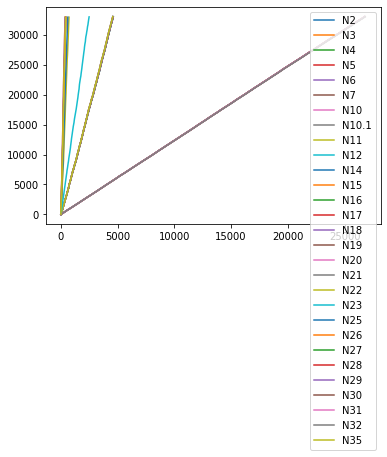

In [14]:
ax = plt.gca()
for i in nan_train.index:
    ind = tuple(num_cols_train[num_cols_train[i].isna()].index)
    ax.plot(ind,label=i)
    plt.legend()


In [15]:
#from percentage of nan values and indices it is evident that several columns have nan values on same indices
sim_cols=[]

for i in nan_train.unique():
    c=[]
    for j in nan_train.index:
        if nan_train[j]==i:
            c.append(j)
    sim_cols.append(c)

In [16]:
# columns have nan values at same indices and their respective distributions.They seem to have same kind of distributions
sim_cols

[['N2'],
 ['N3', 'N6'],
 ['N4', 'N5', 'N16', 'N17', 'N18'],
 ['N7', 'N10', 'N10.1', 'N15', 'N35'],
 ['N11'],
 ['N12'],
 ['N14'],
 ['N19', 'N20', 'N21', 'N22'],
 ['N23'],
 ['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31'],
 ['N32']]

In [17]:
# data preparation for logistic regression 
data_linear1 = num_cols_train.copy()
test_linear1 = num_cols_test.copy()

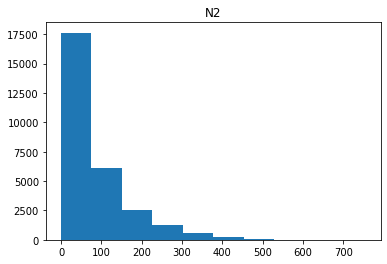

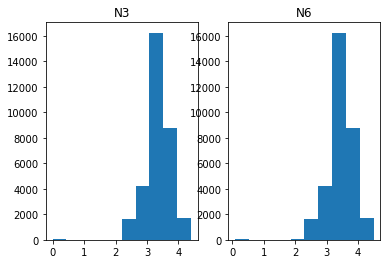

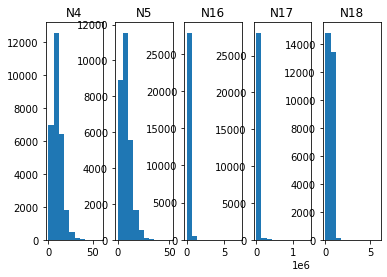

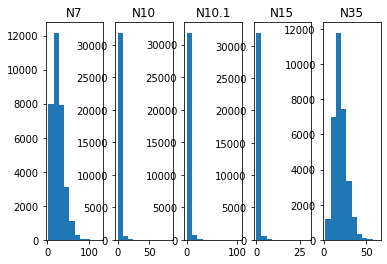

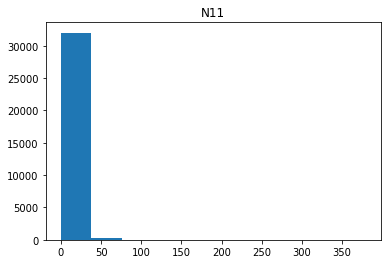

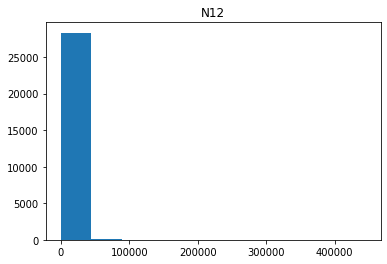

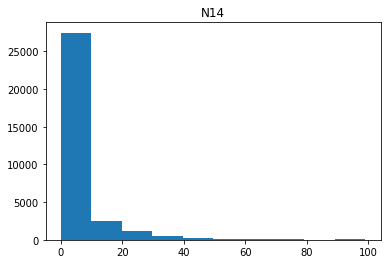

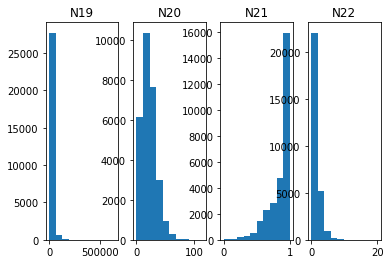

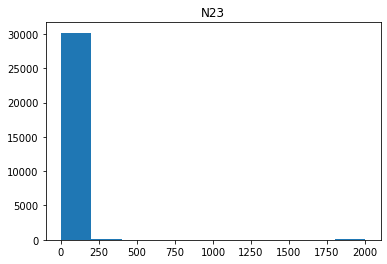

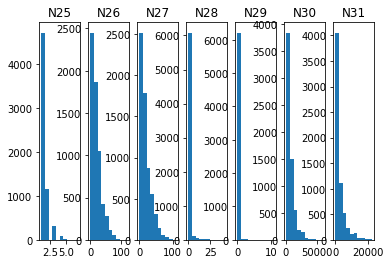

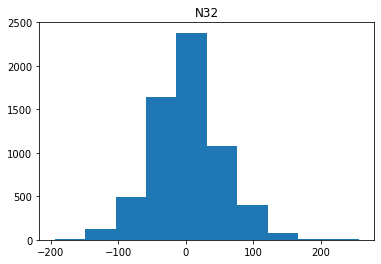

In [18]:
for i in sim_cols:
    k=0
    fig,ax = plt.subplots(nrows=1,ncols=len(i),squeeze=False)
    for a in range(len(i)):
        ax[0,a].hist(data_linear1[i[k]])
        ax[0,a].set_title(i[k])
        k+=1
    plt.show()

In [19]:
# checking numerical type of columns with nan values 
numerical_type={}
for i in nan_train.index:
    temp = data_linear1[~data_linear1[i].isna()]
    if all(x%1==0 for x in temp[i].unique()):
        numerical_type[i] = list(["distinct",temp[i].mode().values[0]])
    else:
        numerical_type[i] = list(["continous",temp[i].quantile(0.5)])


In [20]:
for i in numerical_type.items():
    print(i,"\n\n")

('N2', ['distinct', 1.0]) 


('N3', ['continous', 3.4]) 


('N4', ['distinct', 7.0]) 


('N5', ['distinct', 6.0]) 


('N6', ['continous', 3.495]) 


('N7', ['distinct', 20.0]) 


('N10', ['distinct', 0.0]) 


('N10.1', ['distinct', 0.0]) 


('N11', ['distinct', 2.0]) 


('N12', ['distinct', 0.0]) 


('N14', ['distinct', 0.0]) 


('N15', ['distinct', 0.0]) 


('N16', ['distinct', 0.0]) 


('N17', ['distinct', 0.0]) 


('N18', ['continous', 0.56]) 


('N19', ['distinct', 0.0]) 


('N20', ['distinct', 16.0]) 


('N21', ['continous', 0.92]) 


('N22', ['distinct', 0.0]) 


('N23', ['continous', 40.0]) 


('N25', ['distinct', 1.0]) 


('N26', ['distinct', 9.0]) 


('N27', ['distinct', 9.0]) 


('N28', ['distinct', 0.0]) 


('N29', ['distinct', 0.0]) 


('N30', ['continous', 5000.0]) 


('N31', ['continous', 1108.44]) 


('N32', ['distinct', 0.0]) 


('N35', ['distinct', 20.0]) 




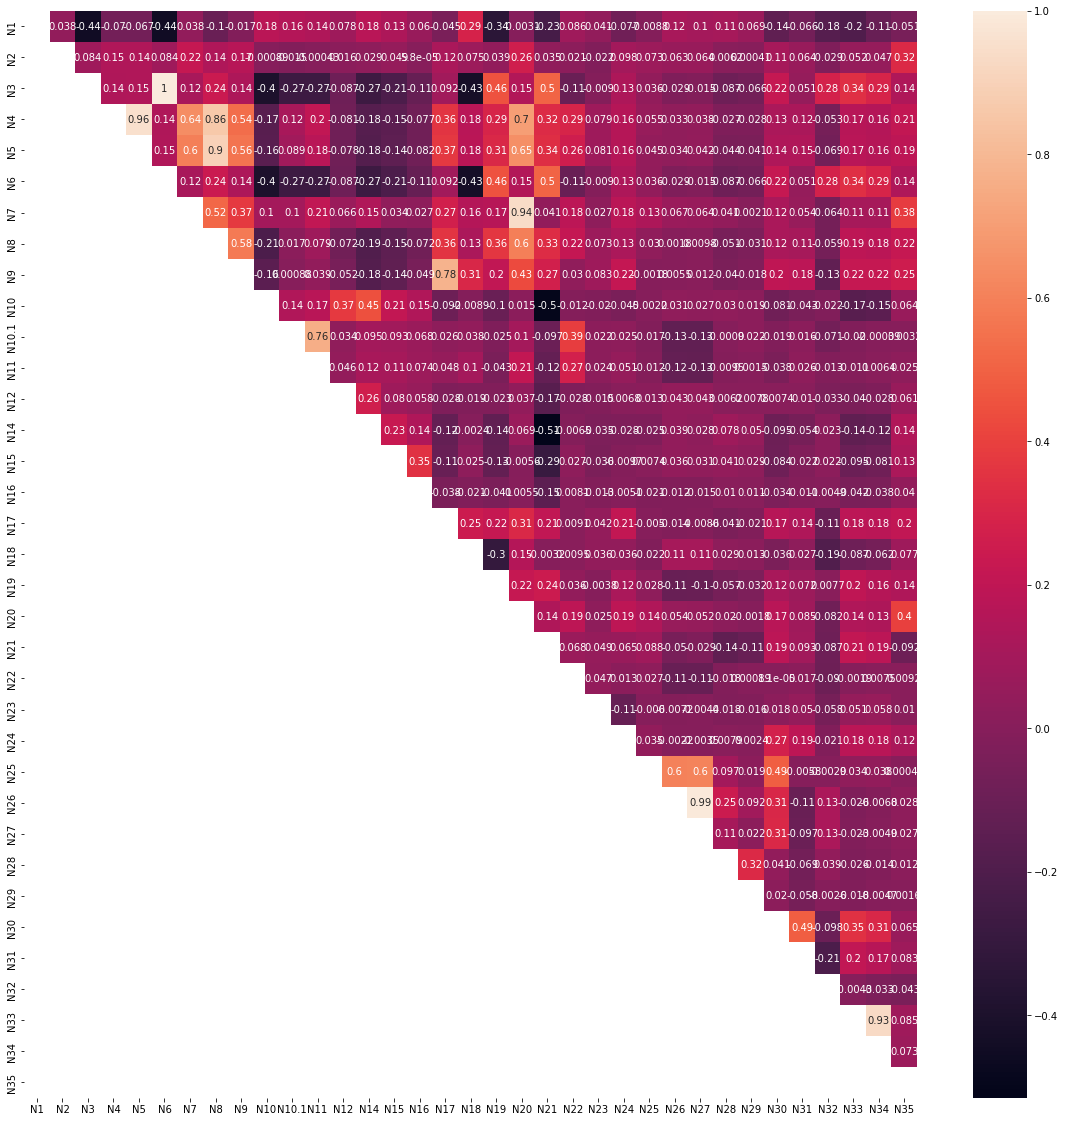

In [21]:
#Checking for multicollinearity as we first build logistic regression
plt.figure(figsize=(20,20))
mask = np.tril(np.ones_like(data_linear1.corr()))
sns.heatmap(data_linear1.corr(),annot=True,mask=mask)
plt.show()

In [22]:
#pearson correlation coefficient less than 0.3 is considered to have weak correlation. Hence considered to be independent
corr={}
non_corr=[]
for i in data_linear1.columns:
    l = []
    c = data_linear1.corr().loc[i,:]
    for j in c.index:
        if abs(c[j])>0.3 and i!=j:
            l.append([j,c[j]])
    if len(l)==0:
        non_corr.append(i)
        continue
    else:
        corr[i] = l

In [23]:
non_corr

['N23', 'N24', 'N32']

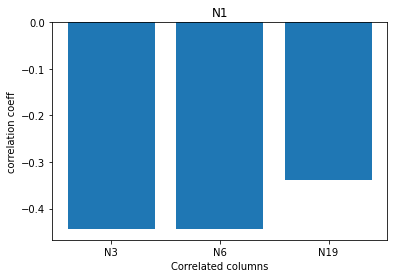

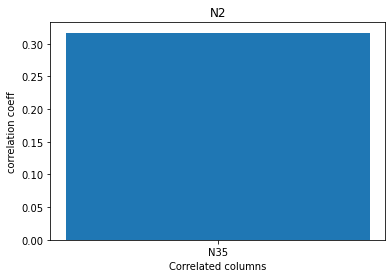

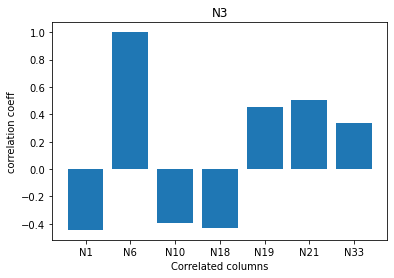

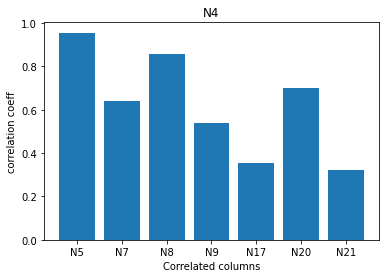

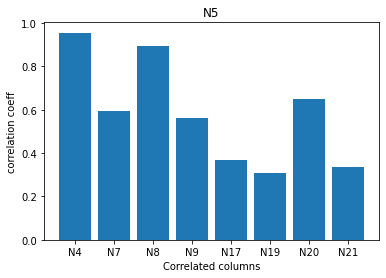

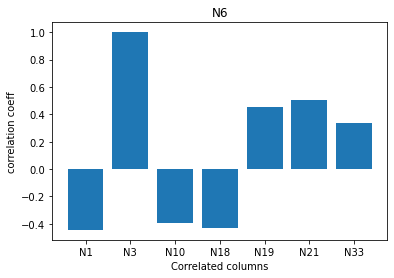

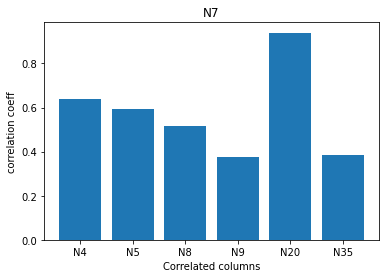

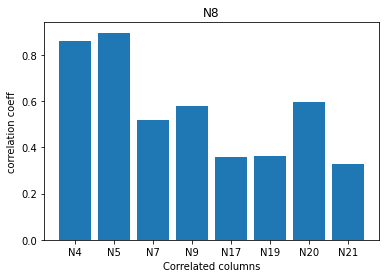

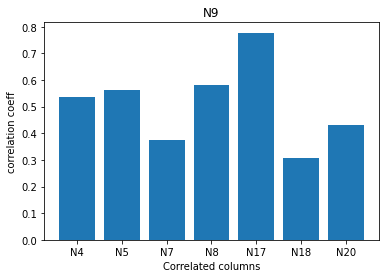

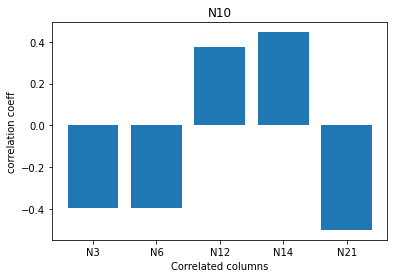

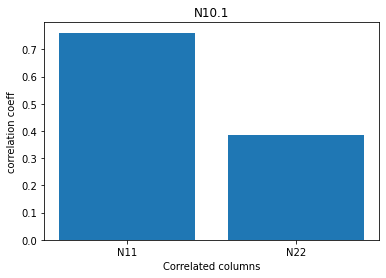

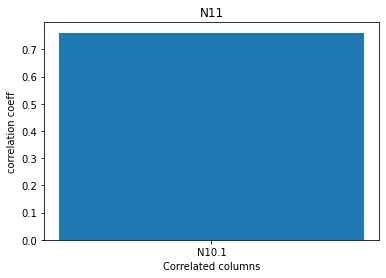

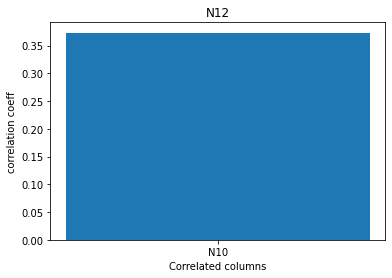

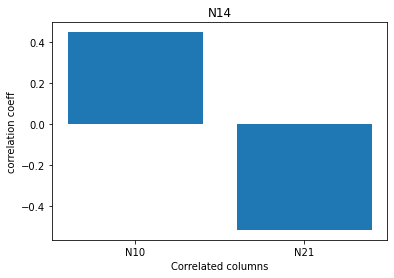

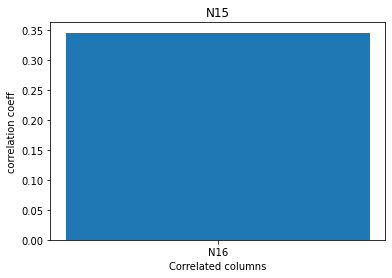

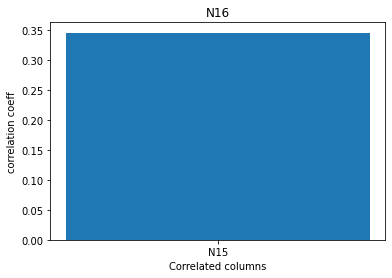

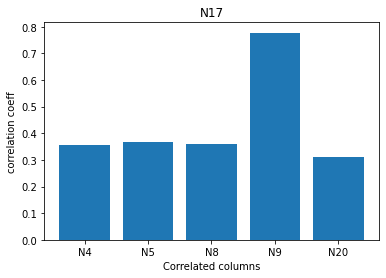

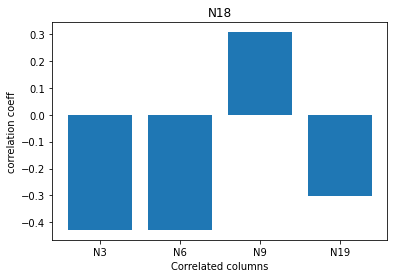

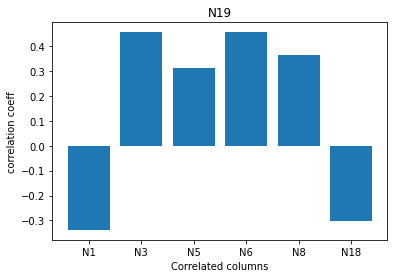

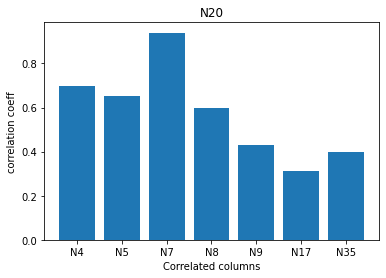

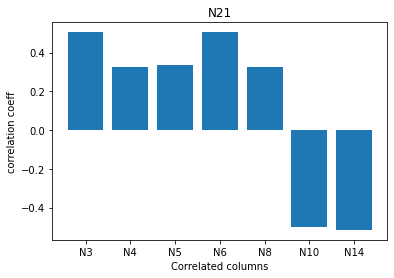

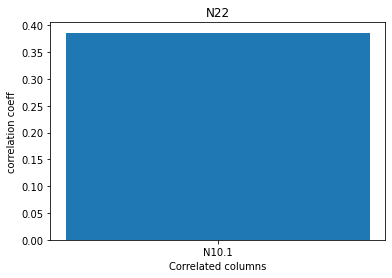

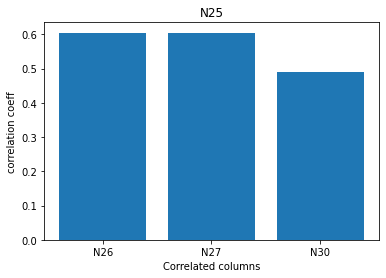

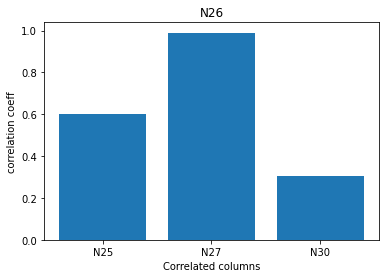

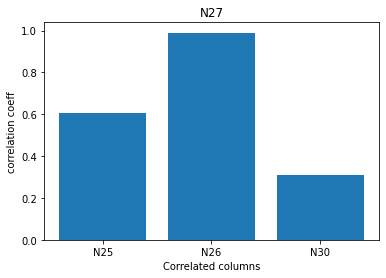

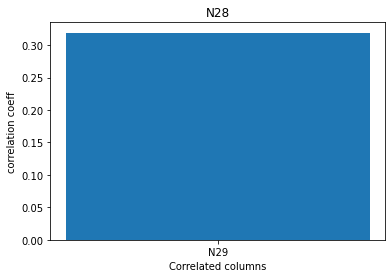

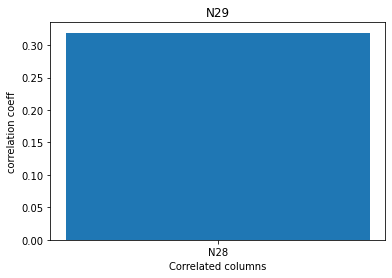

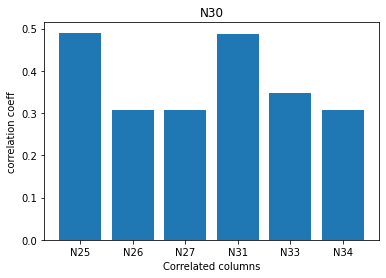

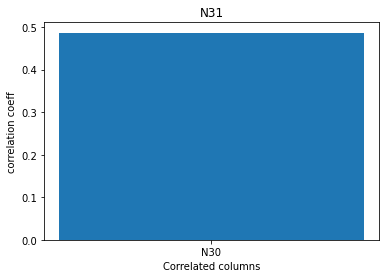

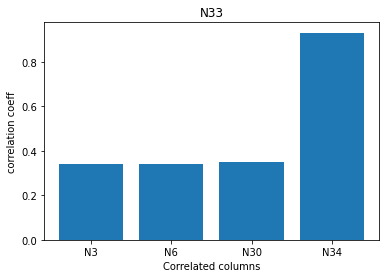

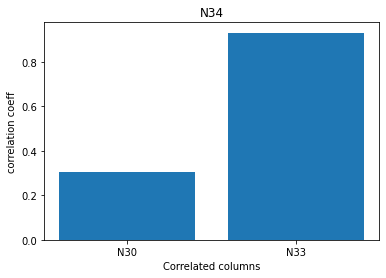

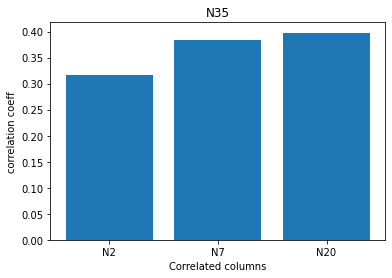

In [24]:
for i,j in corr.items():
    temp=[]
    temp1=[]
    for k in range(len(j)):
        temp.append(j[k][0])
        temp1.append(j[k][1])
    plt.bar(x=temp,height=temp1)
    plt.title(i)
    plt.xlabel("Correlated columns")
    plt.ylabel("correlation coeff")
    plt.show()

In [25]:
high_corr=[]
for i in corr:
    for j in corr[i]:
        if abs(j[1])>0.8:
            high_corr.append((i,j[0]))

In [26]:
high_corr

[('N3', 'N6'),
 ('N4', 'N5'),
 ('N4', 'N8'),
 ('N5', 'N4'),
 ('N5', 'N8'),
 ('N6', 'N3'),
 ('N7', 'N20'),
 ('N8', 'N4'),
 ('N8', 'N5'),
 ('N20', 'N7'),
 ('N26', 'N27'),
 ('N27', 'N26'),
 ('N33', 'N34'),
 ('N34', 'N33')]

In [27]:
col_kept =[]
col_drop=[]
for i,j in high_corr:
    if j in col_kept or i in col_drop:
        continue
    else:
        col_kept.append(i)
        col_drop.append(j)        

In [28]:
col_drop

['N6', 'N5', 'N8', 'N20', 'N27', 'N34']

In [29]:
data_linear1.drop(columns=col_drop,inplace=True)
test_linear1.drop(columns=col_drop,inplace=True)

In [30]:
#since no information for more than 80% and imputing them, will create bias
data_linear1.drop(columns = ["N25","N26","N28","N29","N30","N31","N32"],inplace=True)
test_linear1.drop(columns = ["N25","N26","N28","N29","N30","N31","N32"],inplace=True)

In [31]:
#imputing with median and mode for moderate corelated column
#since some columns have moderate correlation we use l1 regularisation or PCA for linear models
for i in nan_train.index:
    data_linear1.fillna({i:numerical_type[i][1]},inplace=True)
for i in nan_test.index:
    test_linear1.fillna({i:numerical_type[i][1]},inplace=True)

In [32]:
(data_linear1.isna().sum()/len(data_linear1))*100

N1       0.0
N2       0.0
N3       0.0
N4       0.0
N7       0.0
N9       0.0
N10      0.0
N10.1    0.0
N11      0.0
N12      0.0
N14      0.0
N15      0.0
N16      0.0
N17      0.0
N18      0.0
N19      0.0
N21      0.0
N22      0.0
N23      0.0
N24      0.0
N33      0.0
N35      0.0
dtype: float64

In [33]:
(test_linear1.isna().sum()/len(test_linear1))*100

N1       0.0
N2       0.0
N3       0.0
N4       0.0
N7       0.0
N9       0.0
N10      0.0
N10.1    0.0
N11      0.0
N12      0.0
N14      0.0
N15      0.0
N16      0.0
N17      0.0
N18      0.0
N19      0.0
N21      0.0
N22      0.0
N23      0.0
N24      0.0
N33      0.0
N35      0.0
dtype: float64

In [34]:
data_linear1.describe()

,N1,N2,N3,N4,N7,N9,N10,N10.1,N11,N12,...,N16,N17,N18,N19,N21,N22,N23,N24,N33,N35
count,33050.00000,33050.000000,33050.000000,33050.000000,33050.00000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,...,33050.000000,3.305000e+04,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000
mean,19.97653,70.131195,3.359809,9.215340,25.16236,325.585870,0.891710,2.017640,6.998003,874.175613,...,0.019970,1.361588e+04,0.533240,9510.835915,0.865884,0.781059,57.046817,5050.306727,125.629394,19.592587
std,8.11087,83.965241,0.408786,5.257128,14.19463,452.149358,2.620115,3.159965,8.247653,6261.727134,...,0.162883,3.206119e+04,0.324917,20822.089457,0.162064,1.181926,144.964934,6237.726330,104.391919,7.305163
min,0.00000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000
25%,13.45000,9.000000,3.200000,6.000000,15.00000,60.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,4.190000e+02,0.270000,94.000000,0.800000,0.000000,26.000000,2833.333333,54.000000,15.000000
50%,19.27500,40.000000,3.400000,8.000000,23.00000,183.000000,0.000000,1.000000,5.000000,0.000000,...,0.000000,4.363500e+03,0.560000,2069.000000,0.920000,0.000000,40.000000,4166.666667,90.000000,19.000000
75%,26.90000,99.000000,3.600000,12.000000,33.00000,420.000000,1.000000,3.000000,9.000000,0.000000,...,0.000000,1.382900e+04,0.800000,9972.750000,1.000000,1.000000,58.000000,6250.000000,160.000000,24.000000
max,48.00000,755.000000,4.400000,59.000000,129.00000,14985.000000,83.000000,105.000000,379.000000,444745.000000,...,7.000000,1.435667e+06,5.830000,646285.000000,1.000000,20.000000,2002.000000,618547.833300,700.000000,64.000000


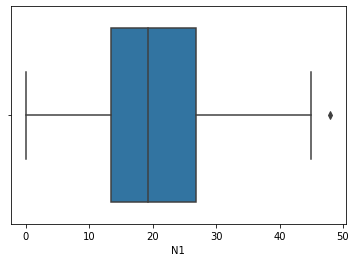

RANGE (0.0, 48.0)


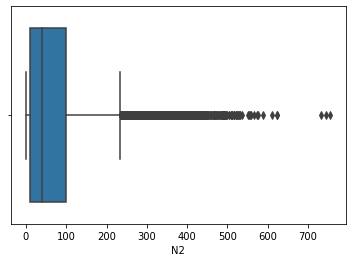

RANGE (0.0, 755.0)


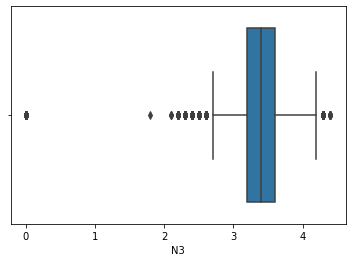

RANGE (0.0, 4.4)


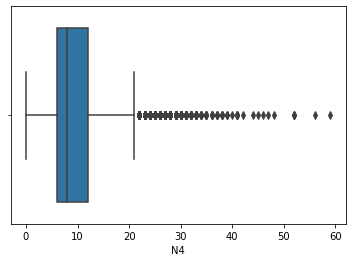

RANGE (0.0, 59.0)


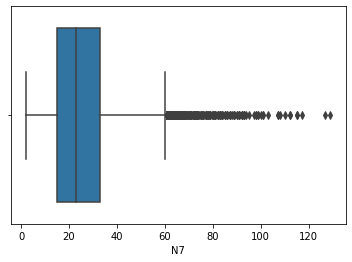

RANGE (2.0, 129.0)


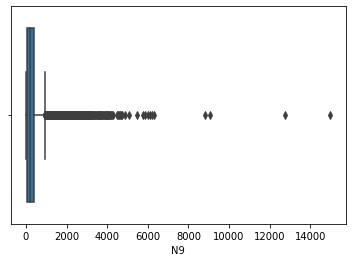

RANGE (0, 14985)


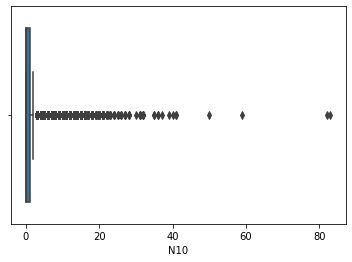

RANGE (0.0, 83.0)


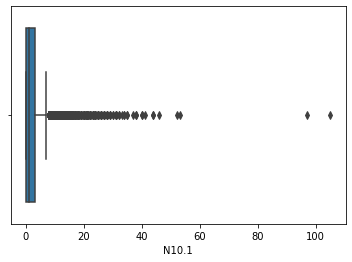

RANGE (0.0, 105.0)


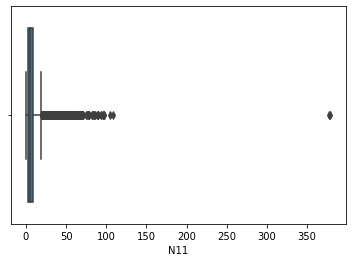

RANGE (0.0, 379.0)


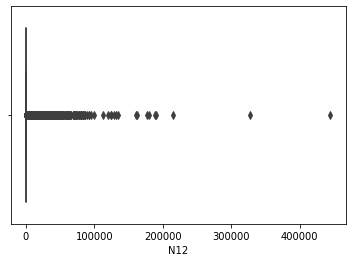

RANGE (0.0, 444745.0)


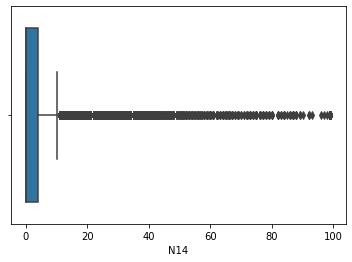

RANGE (0.0, 99.0)


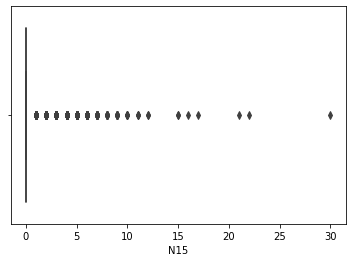

RANGE (0.0, 30.0)


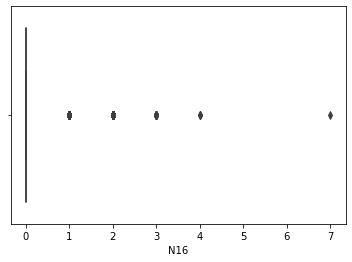

RANGE (0.0, 7.0)


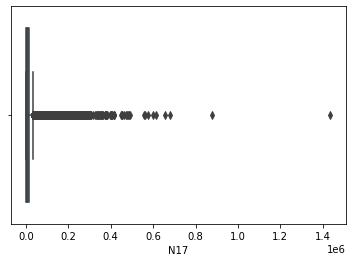

RANGE (0.0, 1435667.0)


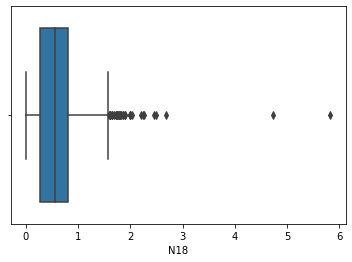

RANGE (0.0, 5.83)


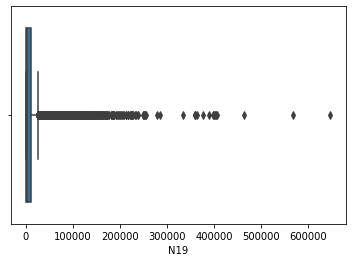

RANGE (0.0, 646285.0)


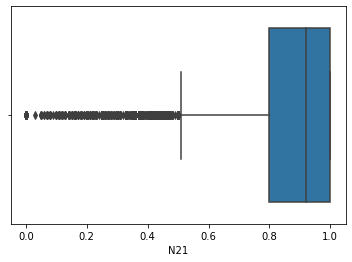

RANGE (0.0, 1.0)


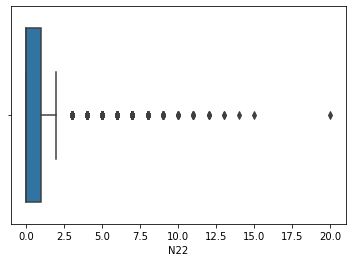

RANGE (0.0, 20.0)


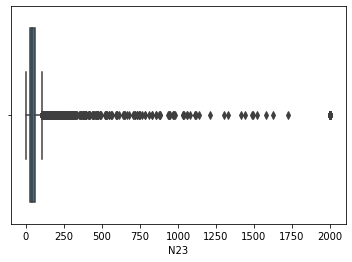

RANGE (0.0, 2002.0)


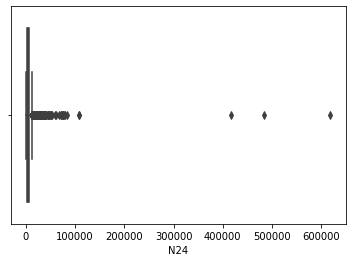

RANGE (0.0, 618547.8333)


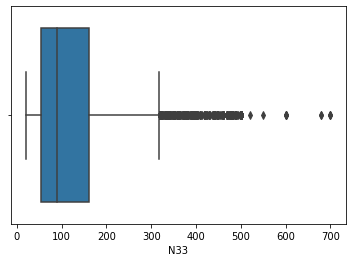

RANGE (20.0, 700.0)


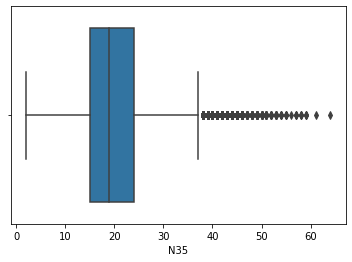

RANGE (2.0, 64.0)


In [35]:
#there is a wide range for the columns. It is beneficial to scale them before applying linear model
#we use robust scaler since it can take care of poutliers also
scaling=[]
for i in data_linear1:
    sns.boxplot(data_linear1[i])
    plt.show()
    print("RANGE",(min(data_linear1[i]),max(data_linear1[i])))
    if (max(data_linear1[i])-min(data_linear1[i]))>100:
        scaling.append(i)

In [36]:
scaling

['N2', 'N7', 'N9', 'N10.1', 'N11', 'N12', 'N17', 'N19', 'N23', 'N24', 'N33']

In [37]:
rsc = RobustScaler()
data_linear1.loc[:,scaling] = rsc.fit_transform(data_linear1.loc[:,scaling])

In [38]:
data_linear1.describe()

,N1,N2,N3,N4,N7,N9,N10,N10.1,N11,N12,...,N16,N17,N18,N19,N21,N22,N23,N24,N33,N35
count,33050.00000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,...,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000
mean,19.97653,0.334791,3.359809,9.215340,0.120131,0.396072,0.891710,0.339213,0.285429,874.175613,...,0.019970,0.689961,0.533240,0.753318,0.865884,0.781059,0.532713,0.258626,0.336126,19.592587
std,8.11087,0.932947,0.408786,5.257128,0.788591,1.255970,2.620115,1.053322,1.178236,6261.727134,...,0.162883,2.390842,0.324917,2.107766,0.162064,1.181926,4.530154,1.825676,0.984829,7.305163
min,0.00000,-0.444444,0.000000,0.000000,-1.166667,-0.508333,0.000000,-0.333333,-0.714286,0.000000,...,0.000000,-0.325391,0.000000,-0.209439,0.000000,0.000000,-1.250000,-1.219512,-0.660377,2.000000
25%,13.45000,-0.344444,3.200000,6.000000,-0.444444,-0.341667,0.000000,-0.333333,-0.428571,0.000000,...,0.000000,-0.294146,0.270000,-0.199924,0.800000,0.000000,-0.437500,-0.390244,-0.339623,15.000000
50%,19.27500,0.000000,3.400000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.560000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000,19.000000
75%,26.90000,0.655556,3.600000,12.000000,0.555556,0.658333,1.000000,0.666667,0.571429,0.000000,...,0.000000,0.705854,0.800000,0.800076,1.000000,1.000000,0.562500,0.609756,0.660377,24.000000
max,48.00000,7.944444,4.400000,59.000000,5.888889,41.116667,83.000000,34.666667,53.428571,444745.000000,...,7.000000,106.734042,5.830000,65.212299,1.000000,20.000000,61.312500,179.818878,5.754717,64.000000


In [39]:
test_linear1.loc[:,scaling] = rsc.transform(test_linear1.loc[:,scaling])

In [40]:
data_linear1["N12"].value_counts(normalize=True)

0.0         0.835885
100.0       0.000908
50.0        0.000847
30.0        0.000787
25.0        0.000545
              ...   
72051.0     0.000030
215315.0    0.000030
1551.0      0.000030
2952.0      0.000030
2135.0      0.000030
Name: N12, Length: 3288, dtype: float64

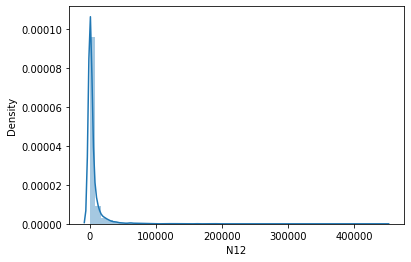

In [41]:
sns.distplot(data_linear1[data_linear1["N12"]!=0]["N12"],kde=True)
plt.show()

In [42]:
#more than 80 percent of N12 is 0 and the distribution of the remaining is also very random.hence it is considered to be redundant
data_linear1.drop(columns="N12",inplace=True)
test_linear1.drop(columns="N12",inplace=True)

In [43]:
y_test=[]

In [44]:
X = pd.concat(objs=[df1.iloc[:,1:9],data_linear1],axis=1)
X_test = pd.concat(objs=[df3.iloc[:,1:9],test_linear1],axis=1)
y = df2.iloc[:,1]

In [45]:
X.shape


(33050, 29)

In [46]:
y.shape

(33050,)

In [47]:
y.value_counts()

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

In [48]:
def random_sample(X,y):
    sampler = RandomOverSampler(sampling_strategy=1.0)
    X_sampled,y_sampled = sampler.fit_resample(X,y)
    return X_sampled,y_sampled

In [49]:
def smote(X,y):
    smote = SMOTE()
    X_sampled,y_sampled = smote.fit_resample(X,y)
    temp = pd.concat(objs=[X_sampled,y_sampled],axis=1)
    temp.sample(frac=1).reset_index().drop(columns="index",inplace=True)
    y_sm = temp.iloc[:,-1]
    X_sm = temp.drop(columns="Dependent_Variable")
    return X_sm,y_sm

In [50]:
def fit(X,y,model):
    model.fit(X,y)
    y_pred = model.predict(X)
    print(classification_report(y,y_pred))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, cmap=plt.cm.Blues,annot=True)
    plt.show()
    return model
def rfe(X,y,model,max_features,min_features):
    f1=[]
    for i in range(min_features,max_features):
        rfe = RFE(estimator=model,n_features_to_select=i)
        rfe.fit(X,y)
        x = X.loc[:,rfe.get_feature_names_out()]
        model.fit(x,y)
        y_pred = model.predict(x)
        f1.append(f1_score(y,y_pred))
    n = range(min_features,max_features)[np.argmax(f1)]
    rfe = RFE(estimator=model,n_features_to_select=n)
    rfe.fit(X,y) 
    return rfe.get_feature_names_out()
def parameter_tuning(X,y,model,paramgrid):
    grid_search = GridSearchCV(estimator=model,param_grid=paramgrid,cv=3)
    grid_search.fit(X,y)
    return grid_search.best_params_        

In [51]:
score_card = pd.DataFrame(columns=['Model_Name','optimum-Threshold','No:of Independent Variable','f1-score', 'auc'])
def update_score_card(algorithm_name,opt,f1,auc,n):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                                    'optimum-Threshold':opt,'No:of Independent Variable':n,
                       'f1-score': f1, 
                       'auc': auc},ignore_index=True)

In [52]:
def model_fitting(model,X,y,**kwrgs):
    if kwrgs["sampling"]=="random":
        X_train,y_train = random_sample(X,y)
    elif kwrgs["sampling"]=="smote":
        X_train,y_train = smote(X,y)
    base_model = fit(X_train,y_train,model)
    feature_names = rfe(X_train,y_train,model,kwrgs["max_features"],kwrgs["min_features"])
    param_grid = kwrgs["param_grid"]
    best_params = parameter_tuning(X.loc[:,feature_names],y,model,param_grid)
    return feature_names, best_params
def final_model(model,X_train,y_train):
    print("Final Model Before optimum threshold\n\n")
    final_model = fit(X_train,y_train,model)
    y_scores = final_model.predict_proba(X_train)[:,1]
    fpr,tpr,thrsl = roc_curve(y_train,y_scores)
    plt.plot(fpr,tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC")
    plt.show()
    auc = roc_auc_score(y_train,y_scores)
    opt_ind = np.argmax(tpr - fpr)
    opt_thrsl = thrsl[opt_ind]
    print("Optimal Threshold:", opt_thrsl,end="\n\n")
    y_pred = [1 if i>opt_thrsl else 0 for i in y_scores]
    print("After assigning optimum Threshold\n\n")
    print(classification_report(y_train,y_pred))
    f1 = f1_score(y_train, y_pred)
    cm = confusion_matrix(y_train, y_pred)
    sns.heatmap(cm, cmap=plt.cm.Blues,annot=True)
    plt.show()
    return (opt_thrsl,f1,auc)

In [53]:
def predict_test(model,X_test,opt):
    y_scores = model.predict_proba(X_test)[:,1]
    return y_scores

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     22844
           1       0.67      0.68      0.67     22844

    accuracy                           0.67     45688
   macro avg       0.67      0.67      0.67     45688
weighted avg       0.67      0.67      0.67     45688



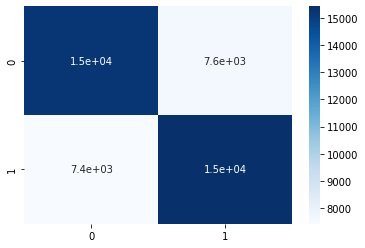

In [54]:
feature_names, best_params = model_fitting(LogisticRegression(),X,y,sampling="random",max_features=25,min_features=15,param_grid={'penalty': ['l1', 'l2','elasticnet'],'C': [0.01,0.1,1,10],'solver':['liblinear','saga']})

In [55]:
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [56]:
feature_names

array(['C1', 'C4', 'C5', 'C6', 'C8', 'N1', 'N2', 'N3', 'N7', 'N9', 'N10',
       'N10.1', 'N11', 'N15', 'N16', 'N17', 'N18', 'N19', 'N21', 'N22',
       'N23', 'N24', 'N33', 'N35'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.67      0.66      0.67     22844
           1       0.67      0.68      0.67     22844

    accuracy                           0.67     45688
   macro avg       0.67      0.67      0.67     45688
weighted avg       0.67      0.67      0.67     45688



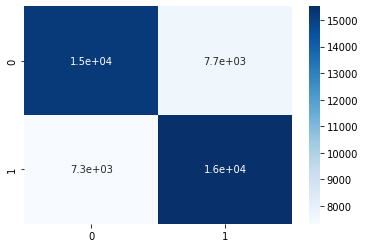

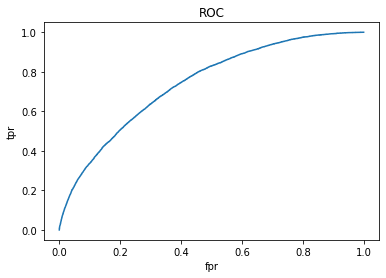

Optimal Threshold: 0.4770764795827447

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.69      0.63      0.66     22844
           1       0.66      0.72      0.69     22844

    accuracy                           0.67     45688
   macro avg       0.68      0.67      0.67     45688
weighted avg       0.68      0.67      0.67     45688



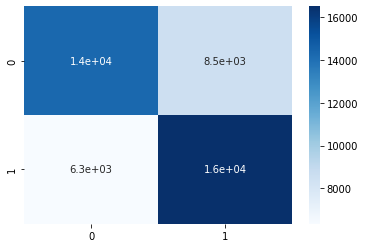

In [57]:
model = LogisticRegression(penalty=best_params["penalty"],solver=best_params["solver"],C=best_params["C"])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("Logistic_regression_with_random_over_sampling",opt_thrsl,f1,auc,len(feature_names))

In [58]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677


In [59]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69     22844
           1       0.69      0.70      0.69     22844

    accuracy                           0.69     45688
   macro avg       0.69      0.69      0.69     45688
weighted avg       0.69      0.69      0.69     45688



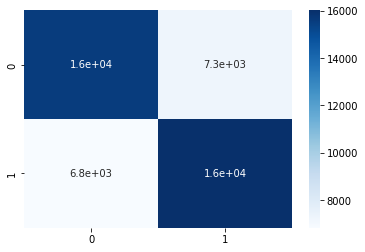

In [60]:
feature_names, best_params = model_fitting(LogisticRegression(),X,y,sampling="smote",max_features=25,min_features=15,param_grid={'penalty': ['l1', 'l2','elasticnet'],'C': [0.01,0.1,1,10],'solver':['liblinear','saga']})

In [61]:
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [62]:
feature_names

array(['C1', 'C6', 'C8', 'N1', 'N3', 'N7', 'N9', 'N10', 'N10.1', 'N11',
       'N15', 'N18', 'N19', 'N21', 'N22', 'N24', 'N33'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.67      0.66      0.67     22844
           1       0.67      0.68      0.67     22844

    accuracy                           0.67     45688
   macro avg       0.67      0.67      0.67     45688
weighted avg       0.67      0.67      0.67     45688



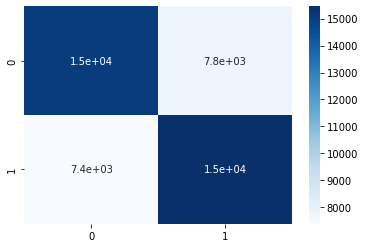

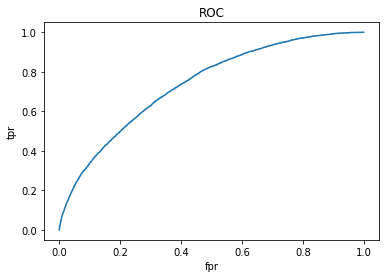

Optimal Threshold: 0.4907384303118458

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.68      0.64      0.66     22844
           1       0.66      0.69      0.68     22844

    accuracy                           0.67     45688
   macro avg       0.67      0.67      0.67     45688
weighted avg       0.67      0.67      0.67     45688



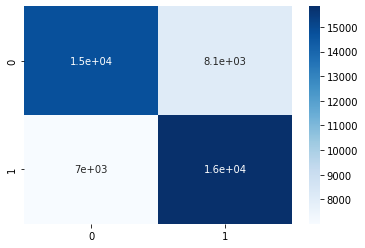

In [63]:
model = LogisticRegression(penalty=best_params["penalty"],solver=best_params["solver"],C=best_params["C"])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("Logistic_regression_with_SMOTE",opt_thrsl,f1,auc,len(feature_names))

In [64]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677
1,Logistic_regression_with_SMOTE,0.490738,17,0.676797,0.736913


In [65]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

In [66]:
# data preparation for logistic regression with PCA
data_linear2 = num_cols_train.copy()
test_linear2 = num_cols_test.copy()

In [67]:
data_linear2.drop(columns = ["N25","N26","N27","N28","N29","N30","N31","N32"],inplace=True)
for i in nan_train.index:
    data_linear2.fillna({i:numerical_type[i][1]},inplace=True)
test_linear2.drop(columns = ["N25","N26","N27","N28","N29","N30","N31","N32"],inplace=True)
for i in nan_test.index:
    test_linear2.fillna({i:numerical_type[i][1]},inplace=True)

In [68]:
scl = MinMaxScaler()
std_numeric_columns = scl.fit_transform(data_linear2)
pca = PCA(0.99)
pca.fit(std_numeric_columns)
cols=pca.transform(std_numeric_columns)


In [69]:
pca.n_components_

19

In [70]:
new_numeric_cols_train = pd.DataFrame(cols,columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19"])

<Axes: >

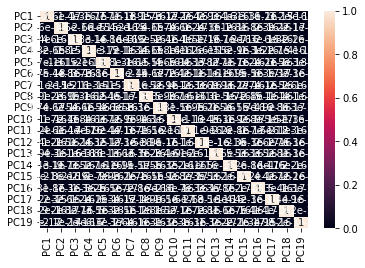

In [71]:
sns.heatmap(new_numeric_cols_train.corr(),annot=True)
#no correlation

In [72]:
std_numeric_columns = scl.transform(test_linear2)
cols=pca.transform(std_numeric_columns)
new_numeric_cols_test = pd.DataFrame(cols,columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19"])

In [73]:
X = pd.concat(objs=[df1.iloc[:,1:9],new_numeric_cols_train],axis=1)
X_test = pd.concat(objs=[df3.iloc[:,1:9],new_numeric_cols_test],axis=1)
y = df2.iloc[:,1]

              precision    recall  f1-score   support

           0       0.66      0.63      0.65     22844
           1       0.65      0.68      0.66     22844

    accuracy                           0.66     45688
   macro avg       0.66      0.66      0.66     45688
weighted avg       0.66      0.66      0.66     45688



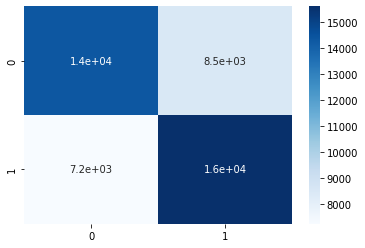

In [74]:
feature_names, best_params = model_fitting(LogisticRegression(),X,y,sampling="random",max_features=25,min_features=15,param_grid={'penalty': ['l1', 'l2','elasticnet'],'C': [0.01,0.1,1,10],'solver':['liblinear','saga']})

In [75]:
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [76]:
feature_names

array(['C1', 'C6', 'C7', 'C8', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14',
       'PC15', 'PC16', 'PC17', 'PC18', 'PC19'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.66      0.66      0.66     22844
           1       0.66      0.67      0.66     22844

    accuracy                           0.66     45688
   macro avg       0.66      0.66      0.66     45688
weighted avg       0.66      0.66      0.66     45688



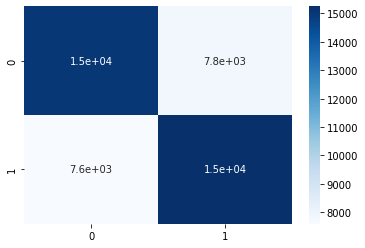

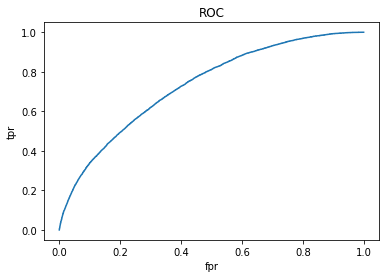

Optimal Threshold: 0.4888961128296809

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.67      0.64      0.66     22844
           1       0.66      0.69      0.67     22844

    accuracy                           0.66     45688
   macro avg       0.66      0.66      0.66     45688
weighted avg       0.66      0.66      0.66     45688



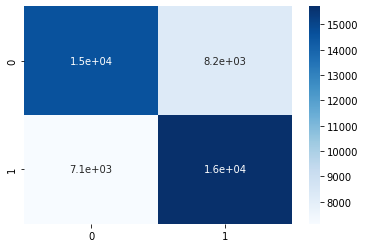

In [77]:
model = LogisticRegression(penalty=best_params["penalty"],solver=best_params["solver"],C=best_params["C"])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("Logistic_regression_with_PC_random",opt_thrsl,f1,auc,len(feature_names))

In [78]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677
1,Logistic_regression_with_SMOTE,0.490738,17,0.676797,0.736913
2,Logistic_regression_with_PC_random,0.488896,23,0.671538,0.731415


In [79]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66     22844
           1       0.66      0.71      0.68     22844

    accuracy                           0.67     45688
   macro avg       0.67      0.67      0.67     45688
weighted avg       0.67      0.67      0.67     45688



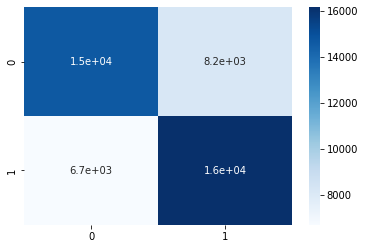

In [81]:
feature_names, best_params = model_fitting(LogisticRegression(),X,y,sampling="smote",max_features=25,min_features=15,param_grid={'penalty': ['l1', 'l2','elasticnet'],'C': [0.01,0.1,1,10],'solver':['liblinear','saga']})

In [82]:
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [83]:
feature_names

array(['C1', 'C6', 'C7', 'C8', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14',
       'PC15', 'PC16', 'PC17', 'PC18', 'PC19'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.67      0.66      0.66     22844
           1       0.66      0.67      0.67     22844

    accuracy                           0.66     45688
   macro avg       0.66      0.66      0.66     45688
weighted avg       0.66      0.66      0.66     45688



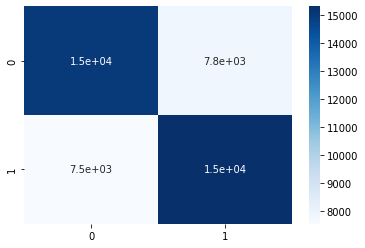

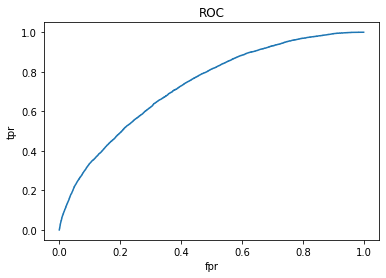

Optimal Threshold: 0.47990890415497267

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.68      0.62      0.65     22844
           1       0.65      0.71      0.68     22844

    accuracy                           0.67     45688
   macro avg       0.67      0.67      0.66     45688
weighted avg       0.67      0.67      0.66     45688



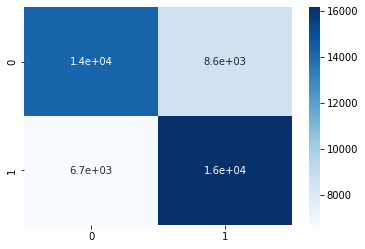

In [84]:
model = LogisticRegression(penalty=best_params["penalty"],solver=best_params["solver"],C=best_params["C"])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("Logistic_regression_with_PC_SMOTE",opt_thrsl,f1,auc,len(feature_names))

In [85]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677
1,Logistic_regression_with_SMOTE,0.490738,17,0.676797,0.736913
2,Logistic_regression_with_PC_random,0.488896,23,0.671538,0.731415
3,Logistic_regression_with_PC_SMOTE,0.479909,23,0.678406,0.731431


In [86]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

In [87]:
# Data preparation for NON linear model
#for non linear models we remove the columns having more than 80 percent nan values and remaining we impute by KNN method
data_non_linear = num_cols_train.copy()
test_non_linear = num_cols_test.copy()
data_non_linear.drop(columns = ["N12","N25","N26","N27","N28","N29","N30","N31","N32"],inplace=True)
test_non_linear.drop(columns = ["N12","N25","N26","N27","N28","N29","N30","N31","N32"],inplace=True)

In [88]:
knn = KNNImputer()

In [89]:
temp=knn.fit_transform(data_non_linear)

In [90]:
temp1=knn.transform(test_non_linear)

In [91]:
data_non_linear = pd.DataFrame(temp,columns=data_non_linear.columns)
test_non_linear = pd.DataFrame(temp1,columns=test_non_linear.columns)

In [92]:
X = pd.concat(objs=[df1.iloc[:,1:9],data_non_linear],axis=1)
X_test = pd.concat(objs=[df3.iloc[:,1:9],test_non_linear],axis=1)
y = df2.iloc[:,1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22844
           1       1.00      1.00      1.00     22844

    accuracy                           1.00     45688
   macro avg       1.00      1.00      1.00     45688
weighted avg       1.00      1.00      1.00     45688



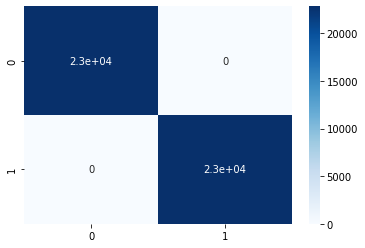

In [93]:
feature_names, best_params = model_fitting(DecisionTreeClassifier(),X,y,sampling="smote",max_features=25,min_features=15,
                param_grid= {
            'max_depth': [6,8,10,12],
            'min_samples_split': [500,1000,2000],
            'min_samples_leaf': [50,100,200]})

In [94]:
best_params

{'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 1000}

In [95]:
feature_names

array(['C3', 'N1', 'N2', 'N9', 'N10', 'N10.1', 'N11', 'N17', 'N18', 'N19',
       'N20', 'N23', 'N24', 'N34', 'N35'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.68      0.61      0.64     22844
           1       0.65      0.72      0.68     22844

    accuracy                           0.66     45688
   macro avg       0.67      0.66      0.66     45688
weighted avg       0.67      0.66      0.66     45688



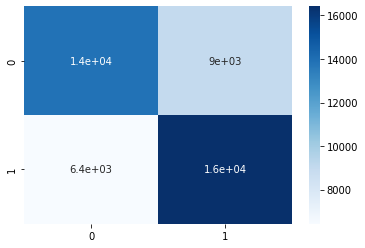

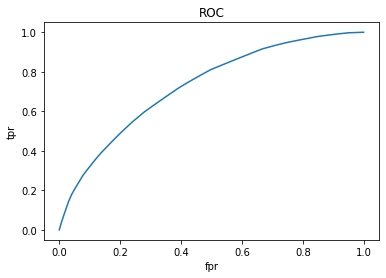

Optimal Threshold: 0.5130919220055711

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.67      0.65      0.66     22844
           1       0.66      0.68      0.67     22844

    accuracy                           0.66     45688
   macro avg       0.66      0.66      0.66     45688
weighted avg       0.66      0.66      0.66     45688



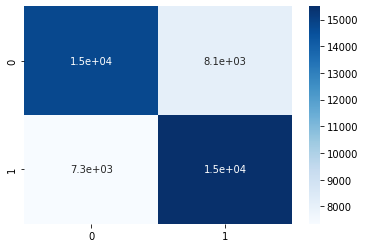

In [96]:
model = DecisionTreeClassifier(max_depth=best_params["max_depth"],
                               min_samples_leaf=best_params["min_samples_split"],min_samples_split=best_params["min_samples_leaf"])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("DecisionTree_with_SMOTE",opt_thrsl,f1,auc,len(feature_names))

In [97]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677
1,Logistic_regression_with_SMOTE,0.490738,17,0.676797,0.736913
2,Logistic_regression_with_PC_random,0.488896,23,0.671538,0.731415
3,Logistic_regression_with_PC_SMOTE,0.479909,23,0.678406,0.731431
4,DecisionTree_with_SMOTE,0.513092,15,0.667442,0.726921


In [98]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

In [99]:
X.shape

(33050, 34)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22844
           1       1.00      1.00      1.00     22844

    accuracy                           1.00     45688
   macro avg       1.00      1.00      1.00     45688
weighted avg       1.00      1.00      1.00     45688



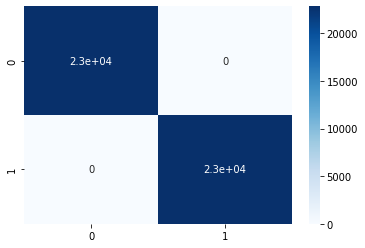

In [101]:
feature_names, best_params = model_fitting(RandomForestClassifier(),X,y,sampling="smote",max_features=35,min_features=34,
                param_grid=  {
            'n_estimators': [50,75],
            'max_depth': [8,10],
            'min_samples_split':[500,600],
            'min_samples_leaf': [200,300],
            'max_features': ['sqrt','log2']})

In [102]:
best_params

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 200,
 'min_samples_split': 500,
 'n_estimators': 75}

In [103]:
feature_names

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N33', 'N34', 'N35'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.71      0.68      0.69     22844
           1       0.69      0.72      0.70     22844

    accuracy                           0.70     45688
   macro avg       0.70      0.70      0.70     45688
weighted avg       0.70      0.70      0.70     45688



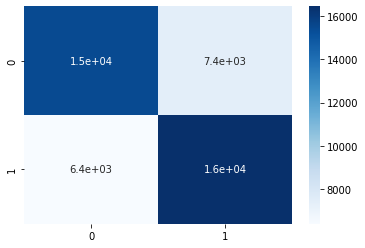

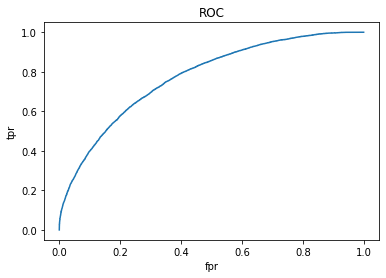

Optimal Threshold: 0.4905746641857164

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.72      0.65      0.68     22844
           1       0.68      0.75      0.71     22844

    accuracy                           0.70     45688
   macro avg       0.70      0.70      0.70     45688
weighted avg       0.70      0.70      0.70     45688



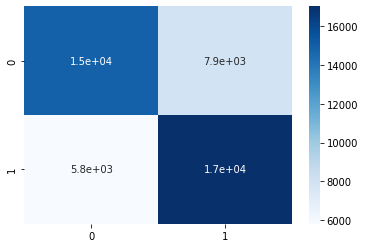

In [104]:
model = RandomForestClassifier(n_estimators=best_params['n_estimators'],max_depth=best_params['max_depth'],
                               max_features=best_params['max_features'],min_samples_leaf=best_params['min_samples_leaf'],
                               min_samples_split=best_params['min_samples_split'])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("RandomForest_with_SMOTE",opt_thrsl,f1,auc,len(feature_names))

In [105]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677
1,Logistic_regression_with_SMOTE,0.490738,17,0.676797,0.736913
2,Logistic_regression_with_PC_random,0.488896,23,0.671538,0.731415
3,Logistic_regression_with_PC_SMOTE,0.479909,23,0.678406,0.731431
4,DecisionTree_with_SMOTE,0.513092,15,0.667442,0.726921
5,RandomForest_with_SMOTE,0.490575,34,0.712675,0.773109


In [106]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     22844
           1       0.77      0.77      0.77     22844

    accuracy                           0.77     45688
   macro avg       0.77      0.77      0.77     45688
weighted avg       0.77      0.77      0.77     45688



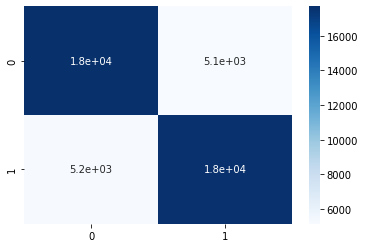

In [108]:
feature_names, best_params = model_fitting(AdaBoostClassifier(),X,y,sampling="smote",max_features=35,min_features=34,
                param_grid= {
           'n_estimators': [75, 100],
            'learning_rate': [0.1, 1]})

In [109]:
best_params

{'learning_rate': 1, 'n_estimators': 100}

In [110]:
feature_names

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N33', 'N34', 'N35'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.69      0.68      0.69     22844
           1       0.69      0.70      0.69     22844

    accuracy                           0.69     45688
   macro avg       0.69      0.69      0.69     45688
weighted avg       0.69      0.69      0.69     45688



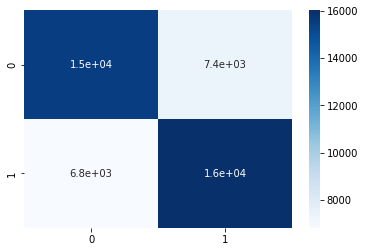

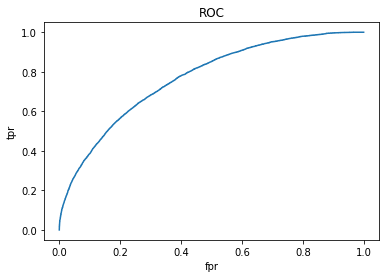

Optimal Threshold: 0.5002066686085761

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.68      0.71      0.70     22844
           1       0.70      0.67      0.69     22844

    accuracy                           0.69     45688
   macro avg       0.69      0.69      0.69     45688
weighted avg       0.69      0.69      0.69     45688



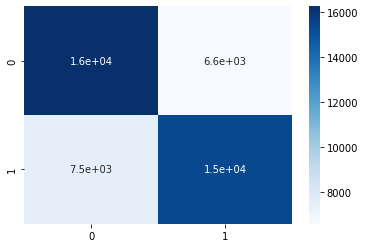

In [111]:
model = AdaBoostClassifier(n_estimators=best_params['n_estimators'],learning_rate=best_params['learning_rate'])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("Adaboost_with_SMOTE",opt_thrsl,f1,auc,len(feature_names))

In [112]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677
1,Logistic_regression_with_SMOTE,0.490738,17,0.676797,0.736913
2,Logistic_regression_with_PC_random,0.488896,23,0.671538,0.731415
3,Logistic_regression_with_PC_SMOTE,0.479909,23,0.678406,0.731431
4,DecisionTree_with_SMOTE,0.513092,15,0.667442,0.726921
5,RandomForest_with_SMOTE,0.490575,34,0.712675,0.773109
6,Adaboost_with_SMOTE,0.500207,34,0.685241,0.767682


In [113]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     22844
           1       0.84      0.76      0.79     22844

    accuracy                           0.80     45688
   macro avg       0.81      0.80      0.80     45688
weighted avg       0.81      0.80      0.80     45688



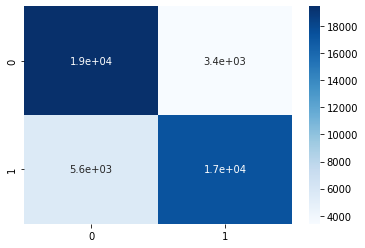

In [114]:
feature_names, best_params = model_fitting(GradientBoostingClassifier(),X,y,sampling="smote",max_features=35,min_features=34,
                param_grid={
           'learning_rate': [1, 0.1],
            'n_estimators': [75, 100],
            'max_depth': [6,8],
            'min_samples_leaf': [100,200]})

In [115]:
best_params

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_leaf': 100,
 'n_estimators': 100}

In [116]:
feature_names

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N33', 'N34', 'N35'], dtype=object)

Final Model Before optimum threshold


              precision    recall  f1-score   support

           0       0.84      0.81      0.82     22844
           1       0.81      0.84      0.83     22844

    accuracy                           0.82     45688
   macro avg       0.82      0.82      0.82     45688
weighted avg       0.82      0.82      0.82     45688



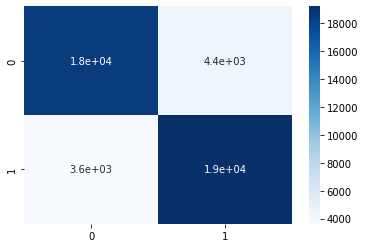

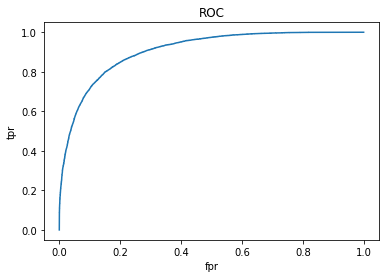

Optimal Threshold: 0.5049215914182653

After assigning optimum Threshold


              precision    recall  f1-score   support

           0       0.83      0.81      0.82     22844
           1       0.82      0.84      0.83     22844

    accuracy                           0.82     45688
   macro avg       0.83      0.82      0.82     45688
weighted avg       0.83      0.82      0.82     45688



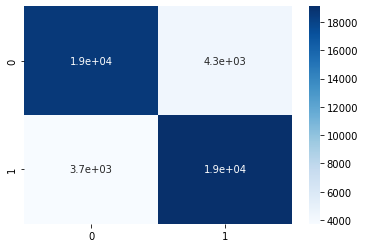

In [117]:
model = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],max_depth=best_params['max_depth'],
                                   learning_rate=best_params['learning_rate'],min_samples_leaf=best_params['min_samples_leaf'])
X_train,y_train = random_sample(X.loc[:,feature_names],y)
opt_thrsl,f1,auc=final_model(model,X_train,y_train)
update_score_card("GradientBoost_with_SMOTE",opt_thrsl,f1,auc,len(feature_names))

In [118]:
score_card

,Model_Name,optimum-Threshold,No:of Independent Variable,f1-score,auc
0,Logistic_regression_with_random_over_sampling,0.477076,24,0.68905,0.740677
1,Logistic_regression_with_SMOTE,0.490738,17,0.676797,0.736913
2,Logistic_regression_with_PC_random,0.488896,23,0.671538,0.731415
3,Logistic_regression_with_PC_SMOTE,0.479909,23,0.678406,0.731431
4,DecisionTree_with_SMOTE,0.513092,15,0.667442,0.726921
5,RandomForest_with_SMOTE,0.490575,34,0.712675,0.773109
6,Adaboost_with_SMOTE,0.500207,34,0.685241,0.767682
7,GradientBoost_with_SMOTE,0.504922,34,0.82697,0.906937


In [119]:
y_test.append(predict_test(model,X_test.loc[:,feature_names],opt_thrsl))

In [120]:
np.array(y_test).shape

(8, 11017)

In [121]:
#As we can see, Gradient Boosting classifier gives the best results(auc-0.9), so we predict using that model
y_best = y_test[np.argmax(score_card["auc"])]

In [122]:
s = pd.Series(y_best,name="Class_1_Probability")

In [123]:
final = pd.concat([df3.iloc[:,0],s],axis=1)

In [127]:
final

,Unique_ID,Class_1_Probability
0,Candidate_1602,0.625177
1,Candidate_29650,0.589394
2,Candidate_31061,0.403360
3,Candidate_5768,0.315539
4,Candidate_27059,0.719198
...,...,...
11012,Candidate_7453,0.685775
11013,Candidate_38211,0.128373
11014,Candidate_25020,0.602074
11015,Candidate_44501,0.245215


In [129]:
final.to_csv('Test\\final_predictions.csv')